# IMT 573 - Problem Set 3 - Working With Data Part 1

### Instructions

Before beginning this assignment, please ensure you have access to a working instance of Jupyter Notebooks with Python 3.

1. First, replace the “YOUR NAME HERE” text in the next cell with your own full name. Any collaborators must also be listed in this cell.

2. Be sure to include well-documented (e.g. commented) code cells, figures, and clearly written text  explanations as necessary. Any figures should be clearly labeled and appropriately referenced within the text. Be sure that each visualization adds value to your written explanation; avoid redundancy – you do no need four different visualizations of the same pattern.

3. Collaboration on problem sets and labs is fun, useful, and encouraged. However, each student must turn in an individual write-up in their own words as well as code/work that is their own. Regardless of whether you work with others, what you turn in must be your own work; this includes code and interpretation of results. The names of all collaborators must be listed on each assignment. Do not copy-and-paste from other students’ responses or code - your code should never be on any other student's screen or machine.

4. All materials and resources that you use (with the exception of lecture slides) must be appropriately referenced within your assignment.

5. Partial credit will be awarded for each question for which a serious attempt at finding an answer has been shown. Students are *strongly* encouraged to attempt each question and document their reasoning process even if they cannot find the correct answer. 

6. After completing the assignment, ensure that your code can run from start to finish without issue. Restart the kernal and run all cells to double check.

Name: Steve Gonzales

Collaborators: None

For this assignment, you'll need (at least) the following packages. If the package does not load, be sure it is properly installed.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In this problem set, we will continue to use data on animals at shelters in the city of [Long Beach, California](https://en.wikipedia.org/wiki/Long_Beach,\_California) that we used in the previous problem set. The data can be found in the `animal_intakes_and_outcomes.csv` file. You can find more information on this data [here](https://web.archive.org/web/20230929001208/https://data.longbeach.gov/explore/dataset/animal-shelter-intakes-and-outcomes/information/?disjunctive.animal_type&disjunctive.primary_color&disjunctive.sex&disjunctive.intake_cond&disjunctive.intake_type&disjunctive.reason&disjunctive.outcome_type&disjunctive.outcome_subtype&disjunctive.intake_is_dead&disjunctive.outcome_is_dead).

### Problem 1: Describing the animal shelter data 

Load the animal sheter data in and ensure you know the variables in the data. Keep the documentation of the dataset [nearby](https://web.archive.org/web/20230929001208/https://data.longbeach.gov/explore/dataset/animal-shelter-intakes-and-outcomes/information/?disjunctive.animal_type&disjunctive.primary_color&disjunctive.sex&disjunctive.intake_cond&disjunctive.intake_type&disjunctive.reason&disjunctive.outcome_type&disjunctive.outcome_subtype&disjunctive.intake_is_dead&disjunctive.outcome_is_dead).

In [94]:
df = pd.read_csv('animal-shelter-intakes-and-outcomes.csv')
df.head()

,Animal ID,Animal Name,Animal Type,Primary Color,Secondary Color,Sex,DOB,Age,Intake Date,Intake Condition,...,Intake Subtype,Reason for Intake,Outcome Date,Crossing,Jurisdiction,Outcome Type,Outcome Subtype,intake_is_dead,outcome_is_dead,was_outcome_alive
0,A002500,PENELOPE,DOG,WHITE,NaN,Spayed,2008-12-09,14.0,2017-07-02,NORMAL,...,POLICE,NaN,2017-07-03,"4600 E OCEAN BLVD, LONG BEACH, CA 90803",LONG BEACH,RETURN TO OWNER,FRE RID HM,Alive on Intake,False,1
1,A226033,SNOOPY,DOG,WHITE,NaN,Neutered,2002-02-23,21.0,2017-10-08,NORMAL,...,OTC,NaN,2017-10-08,"13200 BLK ACORO PL, CERRITOS, CA 90703",CERRITOS,RETURN TO OWNER,FRE RID HM,Alive on Intake,False,1
2,A234250,NINA,DOG,BR BRINDLE,NaN,Spayed,2008-08-01,15.0,2018-06-01,ILL SEVERE,...,CRUELTY,NaN,2018-06-07,"1900 W BURNETT ST, LONG BEACH, CA 90810",LONG BEACH,EUTHANASIA,ILL SEVERE,Alive on Intake,True,0
3,A238953,CECE,DOG,BUFF,NaN,Female,2013-07-17,10.0,2017-01-03,NORMAL,...,FIELD,NaN,2017-01-03,"400 E HULLET ST, LONG BEACH, CA 90805",LONG BEACH,RETURN TO OWNER,FRE RID HM,Alive on Intake,False,1
4,A242600,BARBY,DOG,BLACK,NaN,Spayed,2007-10-27,15.0,2020-11-18,NORMAL,...,OTC,NaN,2020-11-19,"2000 BLK W COWLES ST, LONG BEACH, CA 90813",LONG BEACH,RESCUE,LIVELOVE,Alive on Intake,False,1


#### (a) Describe and summarize

Answer the following questions to describe and summarize the data:

- How many records are in the data?
- How many unique animals are in the data?
- How many types of animals are included in the data? What types are these?
- Across how many years does the data span? What are the years?
- How many primarily black cats less than 3 years of age were found in Los Alamitos?
- What is the most common primary/secondary color combination in the data (consider only when both colors are listed)?

In [95]:
# Need to convert the dates to datetime.datetime
df['intake_date'] = pd.to_datetime(df['Intake Date'], errors='coerce')
df['outcome_date'] = pd.to_datetime(df['Outcome Date'], errors='coerce')

In [96]:
# Do some basic data profiling on the dataset
display(df.tail())
display(df.describe())
print(f'There are {len(df):,} rows in the dataset')

,Animal ID,Animal Name,Animal Type,Primary Color,Secondary Color,Sex,DOB,Age,Intake Date,Intake Condition,...,Outcome Date,Crossing,Jurisdiction,Outcome Type,Outcome Subtype,intake_is_dead,outcome_is_dead,was_outcome_alive,intake_date,outcome_date
39881,A707543,GEORGIE (PUP4),DOG,TAN,NaN,Male,2023-08-10,0.0,2023-09-24,UNDER AGE/WEIGHT,...,NaN,NaN,LONG BEACH,NaN,NaN,Alive on Intake,False,1,2023-09-24,NaT
39882,A707556,*VENTI,CAT,GRAY TABBY,NaN,Male,2023-07-31,0.0,2023-09-24,UNDER AGE/WEIGHT,...,NaN,900 BLK E SPRING STREET SIGNAL HILL CA 90755,SIGNAL HILL,NaN,NaN,Alive on Intake,False,1,2023-09-24,NaT
39883,A707578,*SNOW,CAT,WHITE,NaN,Female,2023-08-13,0.0,2023-09-24,UNDER AGE/WEIGHT,...,NaN,100 BLK MIRA MAR AVE LONG BEACH CA 90803,LONG BEACH,NaN,NaN,Alive on Intake,False,1,2023-09-24,NaT
39884,A707580,*OREO,CAT,BLACK,WHITE,Male,2023-08-24,0.0,2023-09-24,UNDER AGE/WEIGHT,...,NaN,"600 BLOCK PIER D, LONG BEACH CA",LONG BEACH,NaN,NaN,Alive on Intake,False,1,2023-09-24,NaT
39885,A707606,*LOLA,DOG,BLACK,BROWN,Female,2023-05-24,0.0,2023-09-24,NORMAL,...,NaN,1880 SANTA FE AVE,LONG BEACH,NaN,NaN,Alive on Intake,False,1,2023-09-24,NaT


,Age,was_outcome_alive,intake_date,outcome_date
count,34863.000000,39886.000000,39886,39285
mean,5.408714,0.791004,2020-03-25 18:17:03.517023488,2020-03-25 00:15:52.302405632
min,-7.000000,0.000000,2017-01-01 00:00:00,2017-01-01 00:00:00
25%,3.000000,1.000000,2018-06-10 00:00:00,2018-06-16 00:00:00
50%,5.000000,1.000000,2019-12-11 00:00:00,2019-12-18 00:00:00
75%,7.000000,1.000000,2022-03-13 00:00:00,2022-03-02 00:00:00
max,55.000000,1.000000,2023-09-27 00:00:00,2023-09-27 00:00:00
std,3.882323,0.406596,NaN,NaN


There are 39,886 rows in the dataset


In [97]:
# Print out the columns for reference
df.columns

Index(['Animal ID', 'Animal Name', 'Animal Type', 'Primary Color',
       'Secondary Color', 'Sex', 'DOB', 'Age', 'Intake Date',
       'Intake Condition', 'Intake Type', 'Intake Subtype',
       'Reason for Intake', 'Outcome Date', 'Crossing', 'Jurisdiction',
       'Outcome Type', 'Outcome Subtype', 'intake_is_dead', 'outcome_is_dead',
       'was_outcome_alive', 'intake_date', 'outcome_date'],
      dtype='object')

In [98]:
unique_animal_types = df['Animal Type'].unique()
print(f'There are {len(unique_animal_types)} unique Animal Types:', unique_animal_types)
unique_animal_ids = df['Animal ID'].unique()
print(f'Number of unique animals in the dataset: {len(unique_animal_ids):,}')
min_intake_dt, max_intake_dt = df['intake_date'].min(), df['intake_date'].max()
min_outcome_dt, max_outcome_dt = df['outcome_date'].min(), df['outcome_date'].max()
print(f"min date of data: {min_intake_dt.strftime('%Y-%m-%d')}. max date of date: {max_outcome_dt.strftime('%Y-%m-%d')}")
years_data = sorted([int(x) for x in df['outcome_date'][df['outcome_date'].notna()].dt.year.unique()])
print("Years of data spanning", years_data)

There are 10 unique Animal Types: ['DOG' 'CAT' 'RABBIT' 'REPTILE' 'BIRD' 'OTHER' 'LIVESTOCK' 'WILD'
 'GUINEA PIG' 'AMPHIBIAN']
Number of unique animals in the dataset: 38,554
min date of data: 2017-01-01. max date of date: 2023-09-27
Years of data spanning [2017, 2018, 2019, 2020, 2021, 2022, 2023]


In [99]:
# How many primarily black cats less than 3 years of age were found in Los Alamitos?
df_black_cats_losalamitos = df[(df['Animal Type'] == 'CAT') & (df['Primary Color'] == 'BLACK') & (df['Age'] < 3) & (df['Jurisdiction'] == 'Los Alamitos'.upper())]
print(f'There are {len(df_black_cats_losalamitos)} primarily black cats less than 3 years of age found in Los Alamitos')

There are 16 primarily black cats less than 3 years of age found in Los Alamitos


In [100]:
# What is the most common primary/secondary color combination in the data (consider only when both colors are listed)?
# Allow using df[][] notation. Future versions of Pandas might deprecate this.
pd.options.mode.copy_on_write = True
df_multi_colored = df[(df['Primary Color'].notna()) & (df['Secondary Color'].notna())]
df_multi_colored['multi_color'] = df_multi_colored['Primary Color'] + ' & ' + df_multi_colored['Secondary Color']
unique_multi_colors = df_multi_colored.groupby('multi_color')['multi_color'].count().reset_index(name='Count')
unique_multi_colors = unique_multi_colors.sort_values(by='Count', ascending=False)
print(f'There most common color combination in the dataset is {unique_multi_colors.iloc[0,0]} with {unique_multi_colors.iloc[0,1]:,} records')

There most common color combination in the dataset is BLACK & WHITE with 4,309 records


#### (b) Reflect and question 

Comment on the questions (and answers) so far. Were you able to answer all of these questions? Are all questions well defined? Is the data good enough to answer all these?

In [101]:
print("For the most part these questions were straightforward to answer and the data had all the elements required to answer.")
print("However, this question: `How many primarily black cats less than 3 years of age were found in Los Alamitos?` it was unclear to me if I needed to filter on Jurisdiction or City where the animal was found, because they could be different.")
print("Due to the ambiguity of English, this question could have been number of individual animal types or number of animal 'souls': `How many unique animals are in the data?` Since I answered both questions, it shouldn't be a problem.")

For the most part these questions were straightforward to answer and the data had all the elements required to answer.
However, this question: `How many primarily black cats less than 3 years of age were found in Los Alamitos?` it was unclear to me if I needed to filter on Jurisdiction or City where the animal was found, because they could be different.
Due to the ambiguity of English, this question could have been number of individual animal types or number of animal 'souls': `How many unique animals are in the data?` Since I answered both questions, it shouldn't be a problem.


### Problem 2: Animal ages

#### (a) Typical ages

What is the typical age of animals in the data?

In [102]:
# Look at how many Age, DOB have 0 or NaN values
# Which could be an indicator of bad data

# Create a new column with the parsed DOB
df['DOB_parsed'] = pd.to_datetime(df['DOB'], errors='coerce')

for col in ['Age', 'DOB_parsed']:
    if df[col].dtype in ['float64', 'int64']:  # Check if the column is of float type
        zero_count = (df[col] == 0.0).sum()  # Count rows where value is 0.0
        na_count = (df[col].notna()).sum()  # Count rows where value is NaN
        print(f"Column '{col}' has {zero_count:,} rows with 0.0 | {100*(zero_count/len(df[col])):.2f}%")
        print(f"Column '{col}' has {na_count:,} rows with NaN | {100*(na_count/len(df[col])):.2f}%")
    else:
        na_count = (df[col].notna()).sum()
        print(f"Column '{col}' has {na_count:,} rows with NaN | {100*(na_count/len(df[col])):.2f}%")

Column 'Age' has 2,464 rows with 0.0 | 6.18%
Column 'Age' has 34,863 rows with NaN | 87.41%
Column 'DOB_parsed' has 34,863 rows with NaN | 87.41%


In [103]:
# 1.0.3.a is not entirely clear
# Because 87% of the records in the dataset do not have an age, it is impossible to get an accurate answer.
# Assuming we can just calculate based on the data that we do have, do they want the Average? Median? Most frequent?
# I will list all three

df_ages = df[(df['Age'].notna())].groupby('Age')['Age'].count().reset_index(name='Count')
display(df_ages)

,Age,Count
0,-7.0,1
1,0.0,2464
2,1.0,3038
3,2.0,2763
4,3.0,3080
5,4.0,4125
6,5.0,4169
7,6.0,4932
8,7.0,2419
9,8.0,1846


In [104]:
# There is a record with an age of -7, obviously an error, we will just eliminate it
#  and filter out the NaN Ages
df_filtered = df[((df['Age'] > 0) & (df['Age'].notna()))]

mean_age = df_filtered['Age'].mean()
median_age = df_filtered['Age'].median()
most_common = df_filtered.groupby('Age')['Age'].count().reset_index(name='Count').iloc[0, 0]
print(f"The average age of all animals in the dataset is {mean_age}")
print(f"The median age of all animals in the dataset is {median_age}")
print(f"The most common age of all animals in the dataset is {most_common}")

The average age of all animals in the dataset is 5.820451879745663
The median age of all animals in the dataset is 5.0
The most common age of all animals in the dataset is 1.0


#### (b) Defining ages 

What definition of "typical age" did you use to answer part (a)? Did you look at ages by animal type? Did you do any specific exploration and description of this variable prior to using it? If not, please do so now. Is there any missing data? Are there any implausible or invalid entries?<p>

In [105]:
# I did all the exploration as defined in the previous cell. I will do the same by animal type here
for animal_type in list(df_filtered['Animal Type'].unique()):
    mean_age = df_filtered[(df_filtered['Animal Type'] == animal_type)]['Age'].mean()
    median_age = df_filtered[(df_filtered['Animal Type'] == animal_type)]['Age'].median()
    most_common = df_filtered[(df_filtered['Animal Type'] == animal_type)].groupby('Age')['Age'].count().reset_index(name='Count').iloc[0, 0]
    print(f"The average age of {animal_type}s in the dataset is {mean_age}, median age {median_age}, most common age {most_common}.")

The average age of DOGs in the dataset is 7.4728484449563926, median age 7.0, most common age 1.0.
The average age of CATs in the dataset is 4.9552320958962754, median age 5.0, most common age 1.0.
The average age of RABBITs in the dataset is 4.1939736346516, median age 4.0, most common age 1.0.
The average age of REPTILEs in the dataset is 7.052631578947368, median age 6.0, most common age 1.0.
The average age of BIRDs in the dataset is 4.3128249566724435, median age 4.0, most common age 1.0.
The average age of LIVESTOCKs in the dataset is 8.5, median age 5.5, most common age 2.0.
The average age of OTHERs in the dataset is 3.7700587084148727, median age 4.0, most common age 1.0.
The average age of WILDs in the dataset is 4.30390920554855, median age 4.0, most common age 1.0.
The average age of GUINEA PIGs in the dataset is 3.953216374269006, median age 4.0, most common age 1.0.
The average age of AMPHIBIANs in the dataset is 1.0, median age 1.0, most common age 1.0.


#### (c) Ages by jurisdiction 

Now compute typical animal age by jurisdiction. Which three jurisdictions have the highest animal age? Be sure to justify you choice of age calculation and animal/jurisdiction grouping(s).

In [106]:
jurisdiction_ages = []
for jurisdiction in sorted(list(df_filtered['Jurisdiction'].unique())):
    mean_age = df_filtered[(df_filtered['Jurisdiction'] == jurisdiction)]['Age'].mean()
    median_age = df_filtered[(df_filtered['Jurisdiction'] == jurisdiction)]['Age'].median()
    most_common = df_filtered[(df_filtered['Jurisdiction'] == jurisdiction)].groupby('Age')['Age'].count().reset_index(name='Count').iloc[0, 0]
    jurisdiction_ages.append([jurisdiction, mean_age, median_age, most_common])
    print(f"The average age of animals in {jurisdiction} is {mean_age:.3}, median age {median_age}, most common age {most_common}.")

The average age of animals in CERRITOS is 5.95, median age 5.0, most common age 1.0.
The average age of animals in COSTA MESA is 1.0, median age 1.0, most common age 1.0.
The average age of animals in DISTRICT1 is 7.69, median age 6.0, most common age 4.0.
The average age of animals in DISTRICT2 is 8.16, median age 8.0, most common age 4.0.
The average age of animals in DISTRICT3 is 8.38, median age 7.5, most common age 4.0.
The average age of animals in DISTRICT4 is 6.47, median age 5.0, most common age 4.0.
The average age of animals in DISTRICT5 is 7.93, median age 7.5, most common age 4.0.
The average age of animals in DISTRICT6 is 6.11, median age 5.0, most common age 4.0.
The average age of animals in DISTRICT7 is 8.04, median age 7.5, most common age 4.0.
The average age of animals in DISTRICT8 is 5.75, median age 4.5, most common age 3.0.
The average age of animals in DISTRICT9 is 5.74, median age 4.0, most common age 4.0.
The average age of animals in GARDEN GROVE is 5.5, medi

In [107]:
print("Since it is unclear what the requirement is, I will list all three aggregates for the Top 3.")
print("")
print("Top 3 Jurisdictions by Average Age")
top_3_jurisdictions = sorted(jurisdiction_ages, key=lambda x: x[1], reverse=True)[:3]
for jurisdiction, mean_age, median_age, most_common in top_3_jurisdictions:
    print(f"The average age of animals in {jurisdiction} is {mean_age}")
print("")
print("Top 3 Jurisdictions by Median Age")
top_3_jurisdictions = sorted(jurisdiction_ages, key=lambda x: x[2], reverse=True)[:3]
for jurisdiction, mean_age, median_age, most_common in top_3_jurisdictions:
    print(f"The average age of animals in {jurisdiction} is {median_age}")
print("")
print("Top 3 Jurisdictions by Most Common Age")
top_3_jurisdictions = sorted(jurisdiction_ages, key=lambda x: x[3], reverse=True)[:3]
for jurisdiction, mean_age, median_age, most_common in top_3_jurisdictions:
    print(f"The average age of animals in {jurisdiction} is {most_common}")
print("")
print("If I had to chose, I would pick Median so as to provide a more realistic answer for jurisdictions with few data points")

Since it is unclear what the requirement is, I will list all three aggregates for the Top 3.

Top 3 Jurisdictions by Average Age
The average age of animals in TORRANCE AC is 17.0
The average age of animals in DISTRICT3 is 8.375
The average age of animals in DISTRICT2 is 8.157894736842104

Top 3 Jurisdictions by Median Age
The average age of animals in TORRANCE AC is 17.0
The average age of animals in DISTRICT2 is 8.0
The average age of animals in DISTRICT3 is 7.5

Top 3 Jurisdictions by Most Common Age
The average age of animals in TORRANCE AC is 17.0
The average age of animals in IRVINE is 7.0
The average age of animals in LA HABRA is 7.0

If I had to chose, I would pick Median so as to provide a more realistic answer for jurisdictions with few data points


#### (d) Intake seasonality

One may wonder whether intakes are in any way related to weather. We do not have weather information here but let’s analyze how intakes are related to seasons. Which seasons have the most intakes? Why might this be the case? In your communication of your analysis use one graphical visualization and one tabular respresentation of your findings.

In [108]:
# Define a function to map months to seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        print(f"Error trying to put month {month} in a season")

# Apply the function to create a new 'Season' column
df_filtered['season'] = df_filtered['intake_date'].dt.month.apply(get_season)

# Group by season and count occurrences
season_counts = df_filtered['season'].value_counts()

In [109]:
season_counts_formatted = season_counts.apply(lambda x: f"{x:,}")
season_counts_df = season_counts_formatted.reset_index()
season_counts_df.columns = ['Season', 'Count of Intakes']
display(season_counts_df)

,Season,Count of Intakes
0,Summer,"10,293"
1,Spring,"9,092"
2,Fall,"7,520"
3,Winter,"5,493"


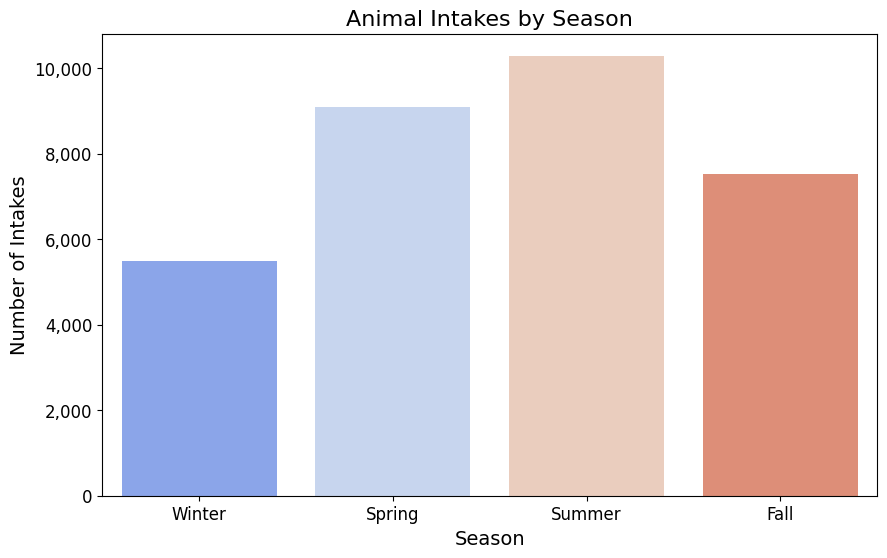

In [110]:
import matplotlib.ticker as ticker

# Sort by seasonal order
season_order = ['Winter', 'Spring', 'Summer', 'Fall']
season_counts = season_counts.reindex(season_order)

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x=season_counts.index, y=season_counts.values, hue=season_counts.index, palette='coolwarm', dodge=False, legend=False)
plt.title('Animal Intakes by Season', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Number of Intakes', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Format the y-axis values with commas
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

#### (e) Challenge your results 

After completing the exploratory analyses from Problem 2, do you have any concerns about your findings? How well defined was your original question? Do you still believe this question can be answered using this dataset? Comment on any ethical and/or privacy concerns you have with your analysis.

In [111]:
# I want to see how many values are in each jurisdiction
# Loop through each jurisdiction and count the rows where Age > 0
for jurisdiction in sorted(df_filtered['Jurisdiction'].unique()):
    count_rows = df_filtered[df_filtered['Jurisdiction'] == jurisdiction].shape[0]
    print(f"The count of rows in {jurisdiction} is {count_rows}")

The count of rows in CERRITOS is 2193
The count of rows in COSTA MESA is 1
The count of rows in DISTRICT1 is 13
The count of rows in DISTRICT2 is 19
The count of rows in DISTRICT3 is 8
The count of rows in DISTRICT4 is 17
The count of rows in DISTRICT5 is 14
The count of rows in DISTRICT6 is 18
The count of rows in DISTRICT7 is 26
The count of rows in DISTRICT8 is 28
The count of rows in DISTRICT9 is 39
The count of rows in GARDEN GROVE is 2
The count of rows in IRVINE is 1
The count of rows in LA CITY is 9
The count of rows in LA COUNTY is 51
The count of rows in LA HABRA is 1
The count of rows in LAGUNA BEACH is 1
The count of rows in LONG BEACH is 28005
The count of rows in LOS ALAMITOS is 554
The count of rows in ORANGE CNTY is 34
The count of rows in OUT OF AREA is 198
The count of rows in SEAACA is 81
The count of rows in SEAL BEACH is 334
The count of rows in SIGNAL HILL is 745
The count of rows in TORRANCE AC is 1
The count of rows in WESTMINSTER is 5


In [112]:
print("Overall, I think the questions are properly posed to get specific information about the data")
print("So we see that Torrance only has one record. We might want to provide the same data in Problem 2 to our customers but filter out where intakes are less than 2 or 3.")
print("We might also want to show data for Signal Hill, Cerritos and Long Beach (ie the jurisdictions with the most intakes), and then all the rest.")
print("Lastly, we would want to know the total animal population of jurisdictions like Long Beach and calculate a percentage, rather than raw numbers, as the raw number might be perceived as people in that jurisdiction not treating animals properly, where as the percentage might show the opposite.")

Overall, I think the questions are properly posed to get specific information about the data
So we see that Torrance only has one record. We might want to provide the same data in Problem 2 to our customers but filter out where intakes are less than 2 or 3.
We might also want to show data for Signal Hill, Cerritos and Long Beach (ie the jurisdictions with the most intakes), and then all the rest.
Lastly, we would want to know the total animal population of jurisdictions like Long Beach and calculate a percentage, rather than raw numbers, as the raw number might be perceived as people in that jurisdiction not treating animals properly, where as the percentage might show the opposite.


### Problem 3: Pets returned to owner in Long Beach

For this problem, only consider instances where the jurisdiction is Long Beach and the outcome is that the animal was returned to owner.

#### (a) How many animals?

How many records are there from Long Beach where the animal was returned to owner?

In [113]:
# Filter for Long Beach and records where the animal was returned to owner
long_beach_returned = df_filtered[(df_filtered['Jurisdiction'] == 'LONG BEACH') & 
                                  (df_filtered['Outcome Type'] == 'Returned to Owner')]

# Count the number of records
count_long_beach_returned = long_beach_returned.shape[0]

print(f"There are {count_long_beach_returned} records from Long Beach where the animal was returned to owner.")

There are 0 records from Long Beach where the animal was returned to owner.


In [114]:
# Let's make sure the above data is correct
df_filtered[(df_filtered['Jurisdiction'] == 'LONG BEACH')]

,Animal ID,Animal Name,Animal Type,Primary Color,Secondary Color,Sex,DOB,Age,Intake Date,Intake Condition,...,Jurisdiction,Outcome Type,Outcome Subtype,intake_is_dead,outcome_is_dead,was_outcome_alive,intake_date,outcome_date,DOB_parsed,season
0,A002500,PENELOPE,DOG,WHITE,NaN,Spayed,2008-12-09,14.0,2017-07-02,NORMAL,...,LONG BEACH,RETURN TO OWNER,FRE RID HM,Alive on Intake,False,1,2017-07-02,2017-07-03,2008-12-09,Summer
2,A234250,NINA,DOG,BR BRINDLE,NaN,Spayed,2008-08-01,15.0,2018-06-01,ILL SEVERE,...,LONG BEACH,EUTHANASIA,ILL SEVERE,Alive on Intake,True,0,2018-06-01,2018-06-07,2008-08-01,Summer
3,A238953,CECE,DOG,BUFF,NaN,Female,2013-07-17,10.0,2017-01-03,NORMAL,...,LONG BEACH,RETURN TO OWNER,FRE RID HM,Alive on Intake,False,1,2017-01-03,2017-01-03,2013-07-17,Winter
4,A242600,BARBY,DOG,BLACK,NaN,Spayed,2007-10-27,15.0,2020-11-18,NORMAL,...,LONG BEACH,RESCUE,LIVELOVE,Alive on Intake,False,1,2020-11-18,2020-11-19,2007-10-27,Fall
6,A282135,WHISKEY,DOG,WHITE,NaN,Neutered,2003-07-07,20.0,2021-02-06,INJURED MILD,...,LONG BEACH,RETURN TO OWNER,MICROCHIP,Alive on Intake,False,1,2021-02-06,2021-02-06,2003-07-07,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39871,A707188,NaN,CAT,BRN TABBY,NaN,Male,2018-09-20,5.0,2023-09-20,ILL SEVERE,...,LONG BEACH,NaN,NaN,Alive on Intake,False,1,2023-09-20,NaT,2018-09-20,Fall
39872,A707191,*BOBBY BROWN,CAT,GRAY,BROWN,Neutered,2016-09-22,7.0,2023-09-20,ILL MODERATETE,...,LONG BEACH,NaN,NaN,Alive on Intake,False,1,2023-09-20,NaT,2016-09-22,Fall
39875,A707411,*RUSSEL,BIRD,BLACK,NaN,Unknown,2022-09-23,1.0,2023-09-23,ILL SEVERE,...,LONG BEACH,EUTHANASIA,ILL SEVERE,Alive on Intake,True,0,2023-09-23,2023-09-23,2022-09-23,Fall
39877,A707460,*SALLY,DOG,WHITE,NaN,Female,2015-09-23,8.0,2023-09-23,AGED,...,LONG BEACH,NaN,NaN,Alive on Intake,False,1,2023-09-23,NaT,2015-09-23,Fall


In [115]:
# We took the question as literal, but it does not match the data. 
# Need to use 'RETURN TO OWNER' instead
# Let's also make these all upper case to ensure we're not missing any with lowercase
# Filter for Long Beach and records where the animal was returned to owner
long_beach_returned = df_filtered[(df_filtered['Jurisdiction'].str.upper() == 'LONG BEACH') & 
                                  (df_filtered['Outcome Type'].str.upper() == 'RETURN TO OWNER')]

# Count the number of records
count_long_beach_returned = long_beach_returned.shape[0]

print(f"There are {count_long_beach_returned:,} records from Long Beach where the animal was returned to owner.")

There are 3,626 records from Long Beach where the animal was returned to owner.


#### (b) How many types of animals?

How many types of animals are in these records?

In [116]:
# Filter for records where the animal was returned to owner
returned_to_owner = df_filtered[df_filtered['Outcome Type'].str.upper() == 'RETURN TO OWNER']

# Get the unique animal types for those records
unique_animal_types = returned_to_owner['Animal Type'].unique()
unique_animal_count = returned_to_owner['Animal Type'].nunique()

print(f"There are {unique_animal_count} unique animal types in 'RETURN TO OWNER' records:")
print(unique_animal_types)

There are 7 unique animal types in 'RETURN TO OWNER' records:
['DOG' 'CAT' 'BIRD' 'REPTILE' 'RABBIT' 'OTHER' 'WILD']


#### (c) Which types of animals?

Which types of animals are present in the entire data set that are not present when looking at instances where the jurisdiction is Long Beach and the outcome is that the animal was returned to owner?

In [117]:
# Get the unique animal types in the entire dataset
all_animal_types = df_filtered['Animal Type'].unique()

# Get the unique animal types in Long Beach with 'RETURN TO OWNER' outcome
long_beach_returned_animal_types = df_filtered[(df_filtered['Jurisdiction'].str.upper() == 'LONG BEACH') & 
                                               (df_filtered['Outcome Type'].str.upper() == 'RETURN TO OWNER')]['Animal Type'].unique()

# Find the animal types that are in the entire dataset but not in the Long Beach 'RETURN TO OWNER' subset
missing_animal_types = list(set(all_animal_types) - set(long_beach_returned_animal_types))

print(f"Animal types present in the entire dataset but not in Long Beach 'RETURN TO OWNER':")
print(missing_animal_types)

Animal types present in the entire dataset but not in Long Beach 'RETURN TO OWNER':
['AMPHIBIAN', 'LIVESTOCK', 'GUINEA PIG']


#### (d) How many of each type of animals?

How many unique animals (not records) are there for each animal from Long Beach where the animal was returned to owner?

In [118]:
# Again, this could be ambiguous, but I interpret it to mean by Animal IDs

# Get the unique animal types in Long Beach with 'RETURN TO OWNER' outcome
long_beach_returned_animal_ids = df_filtered[(df_filtered['Jurisdiction'].str.upper() == 'LONG BEACH') & 
                                             (df_filtered['Outcome Type'].str.upper() == 'RETURN TO OWNER')]['Animal ID'].unique()

print(f"Unique Animal IDs in Long Beach that have been returned to owner: {len(long_beach_returned_animal_ids):,}")

Unique Animal IDs in Long Beach that have been returned to owner: 3,288


#### (e) Decreases during COVID

Did all animal types see a decrease in intakes during 2020 compared to their pre-2020 annual average? Which animal types saw the largest numerical drop and the largest percent drop?

In [119]:
# Filter for records before 2020 and for the year 2020
pre_2020_data = df_filtered[df_filtered['intake_date'].dt.year < 2020]
year_2020_data = df_filtered[df_filtered['intake_date'].dt.year == 2020]

# Calculate the annual intake count for each animal type before 2020 (average by year)
pre_2020_avg = pre_2020_data.groupby(['Animal Type', pre_2020_data['intake_date'].dt.year])['intake_date'].count().groupby('Animal Type').mean()

# Calculate the intake count for each animal type in 2020
intake_2020 = year_2020_data.groupby('Animal Type')['intake_date'].count()

# Combine both results into a single DataFrame
comparison_df = pd.DataFrame({
    'Pre-2020 Avg': pre_2020_avg,
    '2020 Intake': intake_2020
}).fillna(0)  # Handle cases where no data for a type in 2020

# Calculate the absolute drop and the percent drop
comparison_df['Numerical Drop'] = comparison_df['Pre-2020 Avg'] - comparison_df['2020 Intake']
comparison_df['Percent Drop'] = (comparison_df['Numerical Drop'] / comparison_df['Pre-2020 Avg']) * 100

# Find the animal types with the largest numerical and percent drops
largest_numerical_drop = comparison_df['Numerical Drop'].idxmax()
largest_percent_drop = comparison_df['Percent Drop'].idxmax()

# Display results
print(f"Animal type with largest numerical drop: {largest_numerical_drop} ({int(comparison_df.loc[largest_numerical_drop, 'Numerical Drop']):,} animals)")
print(f"Animal type with largest percent drop: {largest_percent_drop} ({comparison_df.loc[largest_percent_drop, 'Percent Drop']:.2f}%)")

# Display the comparison dataframe for review
display(comparison_df)


Animal type with largest numerical drop: DOG (1,016 animals)
Animal type with largest percent drop: REPTILE (69.29%)


,Pre-2020 Avg,2020 Intake,Numerical Drop,Percent Drop
Animal Type,,,,
BIRD,208.333333,155,53.333333,25.600000
CAT,3151.666667,2169,982.666667,31.179270
DOG,2262.000000,1246,1016.000000,44.916004
GUINEA PIG,21.666667,18,3.666667,16.923077
LIVESTOCK,2.000000,1,1.000000,50.000000
OTHER,163.333333,138,25.333333,15.510204
RABBIT,88.333333,39,49.333333,55.849057
REPTILE,42.333333,13,29.333333,69.291339
WILD,134.333333,103,31.333333,23.325062


In [120]:
print(f"Did all animal types experience a drop in intake pre- vs post-COVID? {(comparison_df['Percent Drop'] > 0).all()}")

Did all animal types experience a drop in intake pre- vs post-COVID? True


#### (f) Reflect and Question 

What are your thoughts on the questions (and answers) for problem 3? Were you able to answer all of these questions? Are all questions well-defined? Is the data good enough to answer all these?

In [121]:
print("I was able to answer all the questions with the data. I did not see any major issues with the data.")
print("The data for Livestock is not sufficient enough to draw conclusions on pre- and post-COVID.")
print("The questions seem to be well defined.")

I was able to answer all the questions with the data. I did not see any major issues with the data.
The data for Livestock is not sufficient enough to draw conclusions on pre- and post-COVID.
The questions seem to be well defined.
